# Investigate events in density space

- plot density transects
- plot density streamfunction transects



In [27]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

ccrs = cartopy.crs

In [48]:
### load data

# composite
sMOC_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite-test.nc'
sigma_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_composite_annual.nc'

# anomalies
sigma_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_anomaly.nc'
sMOC_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sMOC_anomaly.nc'

## Density plots

In [49]:
ds_sigma = xr.open_dataset(sigma_path)

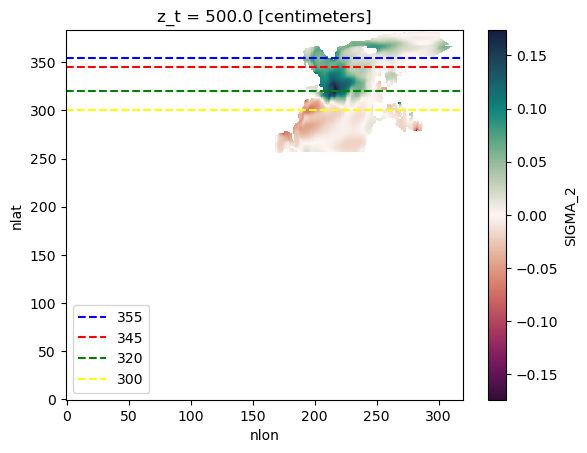

In [50]:
ds_sigma.SIGMA_2.isel(z_t=0).plot(cmap=cmo.curl_r)
plt.axhline(y=355, linestyle='--', color='blue', label='355')
plt.axhline(y=345, linestyle='--', color='red', label='345')
plt.axhline(y=320, linestyle='--', color='green', label='320')
plt.axhline(y=300, linestyle='--', color='yellow', label='300')

plt.legend(loc='lower left')

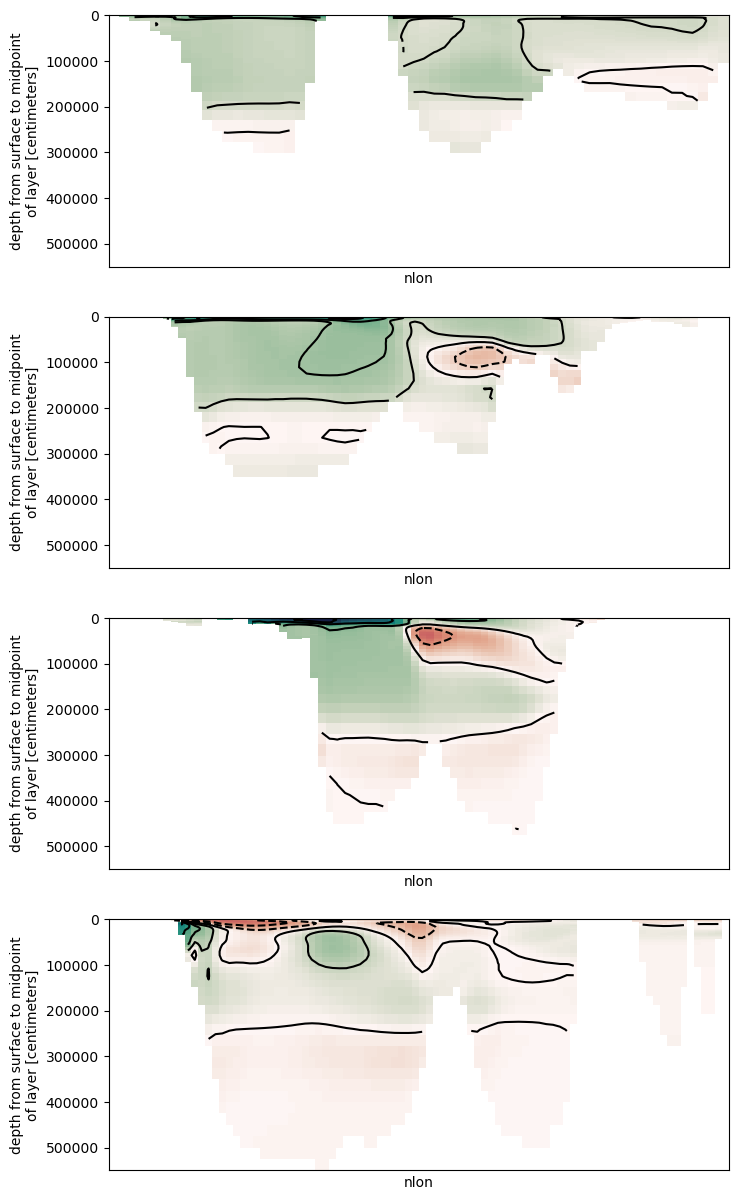

In [57]:
vmin, vmax = -0.16, 0.16 

fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

ds_sigma.SIGMA_2.isel(nlat=355, nlon=slice(190, 250)).plot(ax=axes[0], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=355, nlon=slice(190, 250)).plot.contour(ax=axes[0], yincrease=False, levels=10, colors='k')
axes[0].set_xticks([])
axes[0].set_xticklabels([])

ds_sigma.SIGMA_2.isel(nlat=345, nlon=slice(190, 270)).plot(ax=axes[1], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=345, nlon=slice(190, 270)).plot.contour(ax=axes[1], yincrease=False, levels=10, colors='k')
axes[1].set_xticks([])
axes[1].set_xticklabels([])

ds_sigma.SIGMA_2.isel(nlat=320, nlon=slice(190, 270)).plot(ax=axes[2], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=320, nlon=slice(190, 270)).plot.contour(ax=axes[2], yincrease=False, levels=10, colors='k')
axes[2].set_xticks([])
axes[2].set_xticklabels([])

ds_sigma.SIGMA_2.isel(nlat=300, nlon=slice(180, 270)).plot(ax=axes[3], yincrease=False, cmap=cmo.curl_r, vmin=vmin, vmax=vmax, add_colorbar=False)
ds_sigma.SIGMA_2.isel(nlat=300, nlon=slice(180, 270)).plot.contour(ax=axes[3], yincrease=False, levels=10, colors='k')
axes[3].set_xticks([])
axes[3].set_xticklabels([])

plt.show()

In [7]:
ds_sigma_annual = xr.open_dataset(sigma_annual)
time=np.arange(0, len(ds_sigma_annual.time.values))
vmin, vmax = 35.8, 37.1 

sigma_355 = ds_sigma_annual.SIGMA_2.isel(nlat = 355).mean('nlon')
sigma_345 = ds_sigma_annual.SIGMA_2.isel(nlat = 345).mean('nlon')
sigma_320 = ds_sigma_annual.SIGMA_2.isel(nlat = 320).mean('nlon')
sigma_300 = ds_sigma_annual.SIGMA_2.isel(nlat = 300).mean('nlon')

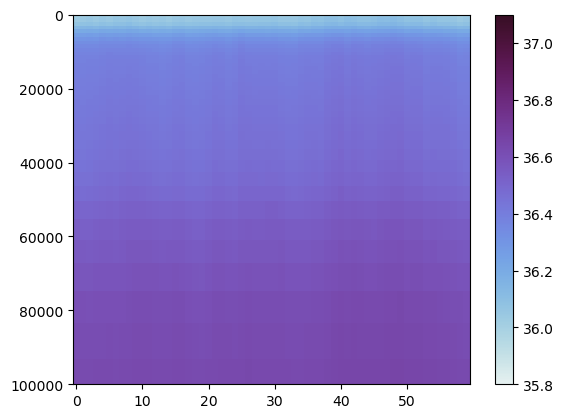

In [8]:
fig, ax = plt.subplots()  
pc = ax.pcolormesh(time, ds_sigma_annual.z_t, sigma_355.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(pc)
ax.set_ylim([0, 100000])  
ax.invert_yaxis()

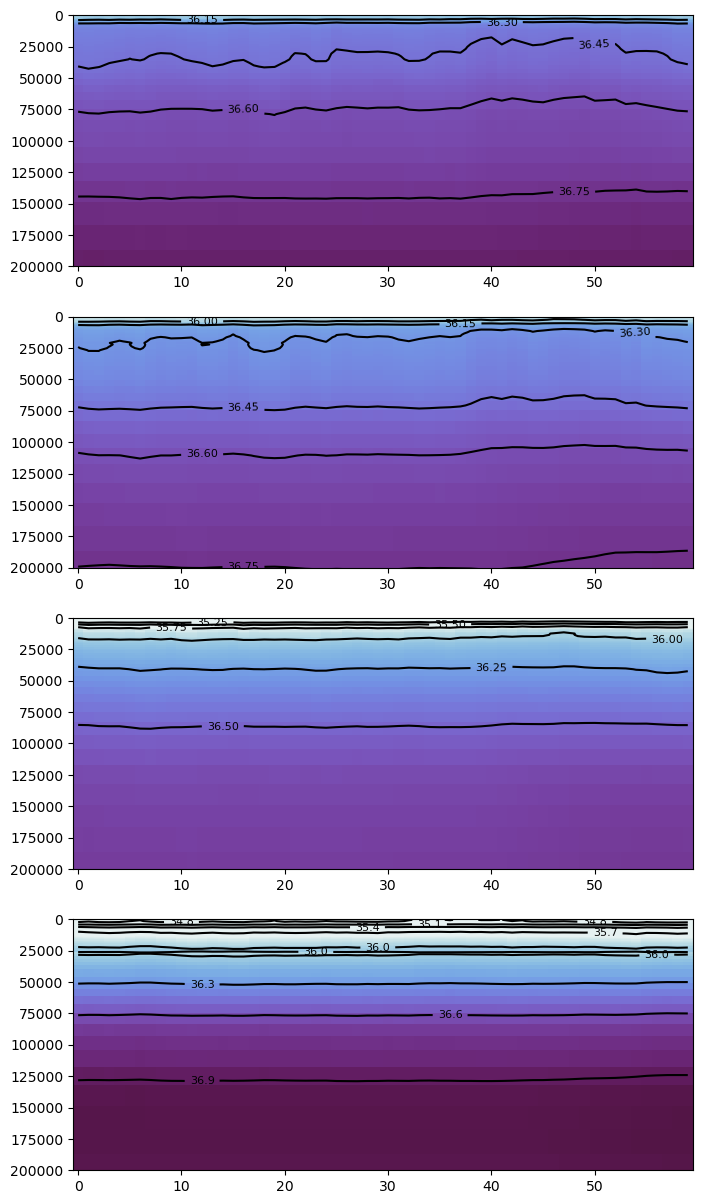

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t, sigma_355.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, sigma_355.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 200000])  
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, sigma_345.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, sigma_345.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 200000])  
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, sigma_320.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, sigma_320.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 200000])  
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time, ds_sigma_annual.z_t, sigma_300.T, cmap=cmo.dense, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, ds_sigma_annual.z_t, sigma_300.T, colors='k')
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_ylim([0, 200000])  
axes[3].invert_yaxis()

## Density anomalies

In [10]:
sigma_355.isel(time=slice(0,40)).mean('time')

<xarray.DataArray 'SIGMA_2' (z_t: 60)>
array([36.04566516, 36.0604502 , 36.09405966, 36.15416159, 36.21745171,
       36.27252389, 36.3131274 , 36.34138991, 36.36112444, 36.37547216,
       36.38643798, 36.39570591, 36.39935707, 36.40240496, 36.40615793,
       36.40768344, 36.41056735, 36.41342156, 36.41622475, 36.41905067,
       36.42203234, 36.42524452, 36.42859426, 36.43221513, 36.43483496,
       36.4395327 , 36.44501778, 36.44787352, 36.45042439, 36.45780985,
       36.46499094, 36.47700562, 36.49362242, 36.52065043, 36.54452578,
       36.56417344, 36.58586769, 36.61102459, 36.62217   , 36.63274547,
       36.65406672, 36.68816352, 36.73553322, 36.78239635, 36.82506205,
       36.85916083, 36.88542694, 36.91153042, 36.94707558, 36.93880174,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05

In [15]:
anom_sigma_355 = sigma_355 - sigma_355.isel(time=slice(0,40)).mean('time')
anom_sigma_345 = sigma_345 - sigma_345.isel(time=slice(0,40)).mean('time')
anom_sigma_320 = sigma_320 - sigma_320.isel(time=slice(0,40)).mean('time')
anom_sigma_300 = sigma_300 - sigma_300.isel(time=slice(0,40)).mean('time')

vmin, vmax = -0.16, 0.16 

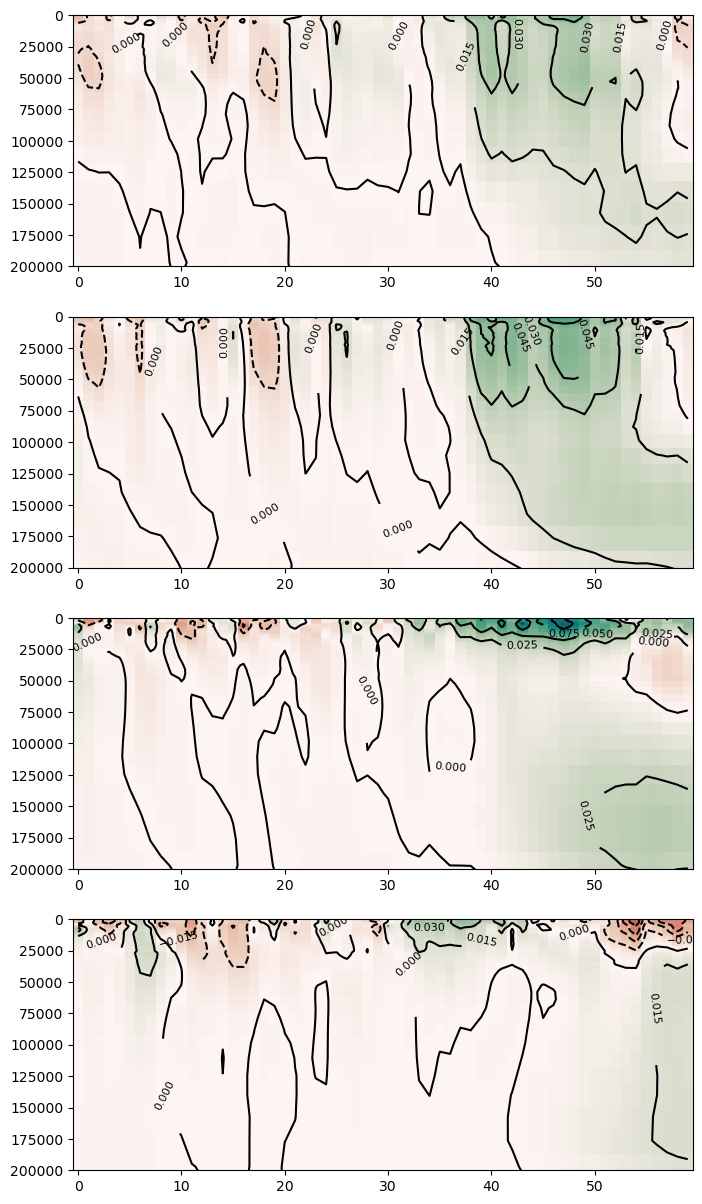

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_355.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, ds_sigma_annual.z_t, anom_sigma_355.T, colors='k')
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_ylim([0, 200000])  
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_345.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, ds_sigma_annual.z_t, anom_sigma_345.T, colors='k')
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_ylim([0, 200000])  
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_320.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, ds_sigma_annual.z_t, anom_sigma_320.T, colors='k')
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_ylim([0, 200000])  
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time, ds_sigma_annual.z_t, anom_sigma_300.T, cmap=cmo.curl_r, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, ds_sigma_annual.z_t, anom_sigma_300.T, colors='k')
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_ylim([0, 200000])  
axes[3].invert_yaxis()

## Density streamfunction plots

In [17]:
ds_sMOC = xr.open_dataset(sMOC_annual)
time=np.arange(0, len(ds_sMOC.time.values))

sigma_level =[12., 16., 20., 24., 28., 28.5, 29.2, 29.4, 29.6, 29.8, 30., 30.2, 30.4, 30.6, 30.8, 31., 31.2, 31.4, 31.6, 31.8, 32., 32.2, 32.4, 32.6, 32.8, 33., 33.2, 33.4,
                   33.6, 33.8, 34., 34.2, 34.4, 34.6, 34.8, 35., 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.1, 36.15, 36.2, 36.25, 36.3, 36.35, 
                   36.4, 36.42, 36.44, 36.46, 36.48, 36.5, 36.52, 36.54, 36.56, 36.57, 
                   36.58, 36.59, 36.6, 36.61, 36.62, 36.63, 36.64, 36.65, 36.66, 36.67, 36.68, 36.69, 36.7, 36.71, 36.72, 36.73, 36.74, 36.75, 36.76, 
                   36.78, 36.8, 36.82, 36.84, 36.86, 36.88, 36.9, 36.92, 36.94, 36.96, 36.98, 37., 37.02, 37.04, 37.06, 37.08, 37.1, 37.12, 
                   37.14, 37.16, 37.18, 37.2, 37.25, 37.3, 37.35, 37.4, 37.45, 37.6, 37.7, 37.8, 37.9, 38., 39., 40., 41., 42.]
fake_sigma = np.arange(len(sigma_level))

vmin, vmax = -30, 30

In [18]:
smoc_355 = ds_sMOC.densMOC.isel(nlat=355-250)
smoc_345 = ds_sMOC.densMOC.isel(nlat=345-250)
smoc_320 = ds_sMOC.densMOC.isel(nlat=320-250)
smoc_300 = ds_sMOC.densMOC.isel(nlat=300-250)

(40.0, 100.0)

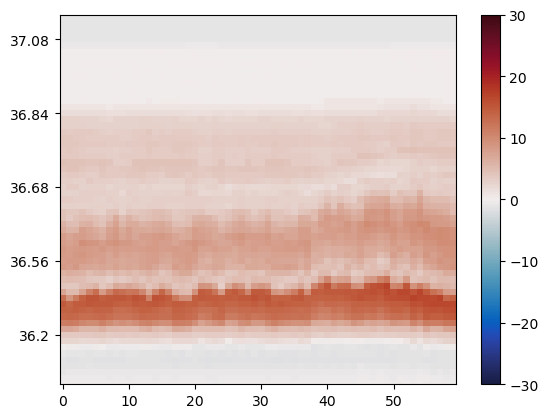

In [20]:
fig, ax = plt.subplots()  

pc = ax.pcolormesh(time,fake_sigma, smoc_355.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(pc)

plt.yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])

ax.set_ylim([40, 100])  

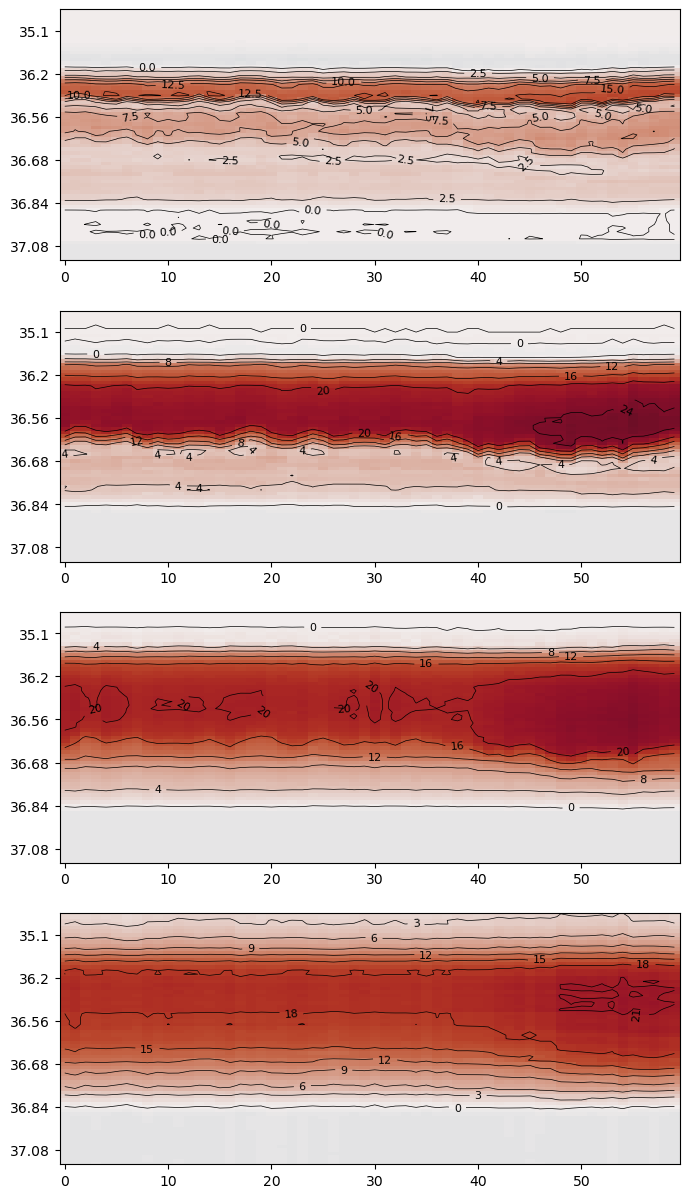

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, fake_sigma, smoc_355.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, fake_sigma, smoc_355.T, colors='k', linewidths=0.5)
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[0].set_ylim([30, 100])
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, fake_sigma, smoc_345.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, fake_sigma, smoc_345.T, colors='k', linewidths=0.5)
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[1].set_ylim([30, 100]) 
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time,fake_sigma, smoc_320.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, fake_sigma, smoc_320.T, colors='k', linewidths=0.5)
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[2].set_ylim([30, 100]) 
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time,fake_sigma, smoc_300.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, fake_sigma, smoc_300.T, colors='k', linewidths=0.5)
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[3].set_ylim([30, 100]) 
axes[3].invert_yaxis()
plt.show()

In [40]:
anom_smoc_355 = smoc_355 - smoc_355.isel(time=slice(0,40)).mean('time')
anom_smoc_345 = smoc_345 - smoc_345.isel(time=slice(0,40)).mean('time')
anom_smoc_320 = smoc_320 - smoc_320.isel(time=slice(0,40)).mean('time')
anom_smoc_300 = smoc_300 - smoc_300.isel(time=slice(0,40)).mean('time')

vmin, vmax = -20, 20

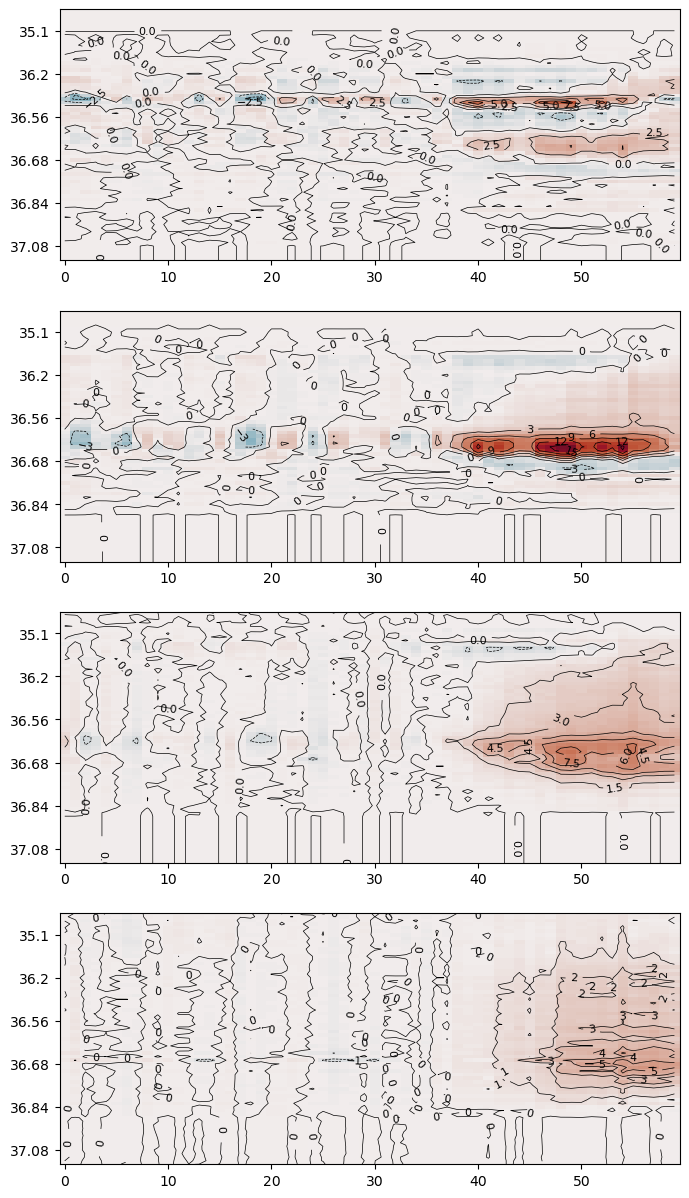

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(8, 15))  # Adjust the figsize as needed

pc = axes[0].pcolormesh(time, fake_sigma, anom_smoc_355.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[0].contour(time, fake_sigma, anom_smoc_355.T, colors='k', linewidths=0.5)
axes[0].clabel(contour_plot, inline=True, fontsize=8)
axes[0].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[0].set_ylim([30, 100])
axes[0].invert_yaxis()
pc = axes[1].pcolormesh(time, fake_sigma, anom_smoc_345.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[1].contour(time, fake_sigma, anom_smoc_345.T, colors='k', linewidths=0.5)
axes[1].clabel(contour_plot, inline=True, fontsize=8)
axes[1].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[1].set_ylim([30, 100]) 
axes[1].invert_yaxis()
pc = axes[2].pcolormesh(time,fake_sigma, anom_smoc_320.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[2].contour(time, fake_sigma, anom_smoc_320.T, colors='k', linewidths=0.5)
axes[2].clabel(contour_plot, inline=True, fontsize=8)
axes[2].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[2].set_ylim([30, 100]) 
axes[2].invert_yaxis()
pc = axes[3].pcolormesh(time,fake_sigma, anom_smoc_300.T, cmap=cmo.balance, vmin=vmin, vmax=vmax)
contour_plot = axes[3].contour(time, fake_sigma, anom_smoc_300.T, colors='k', linewidths=0.5)
axes[3].clabel(contour_plot, inline=True, fontsize=8)
axes[3].set_yticks(np.arange(len(sigma_level))[::12], sigma_level[::12])
axes[3].set_ylim([30, 100]) 
axes[3].invert_yaxis()